## Mental Accounting

This notebook aims to recreate some of the findings of **Thaler, Richard (1985), “Mental Accounting and Consumer Choice,” Marketing Science, 4 (3), 199–214.** Specifically, we try to see if LLMs like **ChatGPT** abide by some rules of Mental Accounting and Prospect Theory.

Prospect theory states that originating from a start point, losses *weigh more heavily* than gains. Therefore, the graph depicting this phenomenon is steeper in the 3rd quadrant, than it is in the first. When confronted with a hypothetical situation in which MR. A wins 100$, *loses* 80$ and ends up with 20$, whereas Mr. B simply won 20$, the latter was perceived to be happier by the majority of participants in the study that is to be recreated in the following. 

In [1]:
import openai
import matplotlib.pyplot as plt
import os 

In [2]:
# Get API key (previously saved as environmental variable)
openai.api_key = os.environ["OPENAI_API_KEY"]

## Introductory example (translated from slides)

- Prompting the model with role of random pedestrian.

In [3]:
answers = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 0.5, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who would you say is happier? 
          A: Mister A
          B: Mister B
          C: No difference"""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers.append(answer.strip())
    

In [4]:
# Collecting results without priming
A = answers.count("A")
B = answers.count("B")
C = answers.count("C")

# print(f"In the non-primed prompt the answer A was chosen {A} times, while B was chosen {B} times. Equally happy was stated {C} times.")
# print(f"In the primed prompt the answer A was chosen {A_mr} times, while B was chosen {B_mr} times. Equally happy was stated {C_mr} times.")

#### Plotting the results

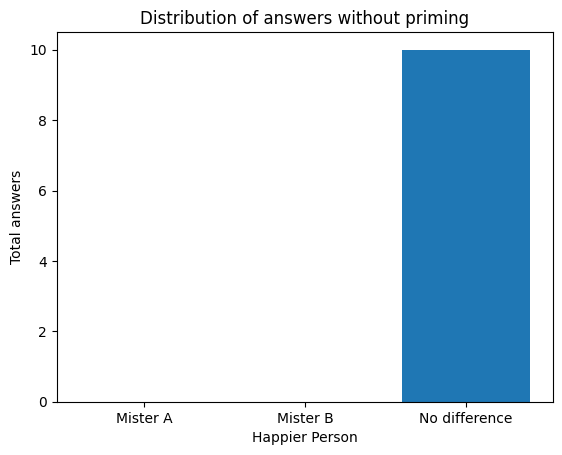

In [5]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Distribution of answers without priming')

# Show the plot
plt.show()

- Prompting the model with role of market researcher.

In [55]:
answers_mr = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4",
        max_tokens = 1,
        temperature = 0.6,
        messages = [
        {"role": "user", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting. In a survey you are presented the following situation: 
          Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who would you say is happier? Please answer by only giving the letter of the answer option:
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_mr.append(answer.strip())

In [56]:
# Collecting results for prompt with priming
A_mr = answers_mr.count("A")
B_mr = answers_mr.count("B")
C_mr = answers_mr.count("C")

Playing around with the *temperature* parameter I found out, that for lower values our results are as desired, whereas 
for higher values, no real systematic trend appeared to be present. The results were rather random.
Also I am not yet sure, if setting a context with the *system* role really worked.

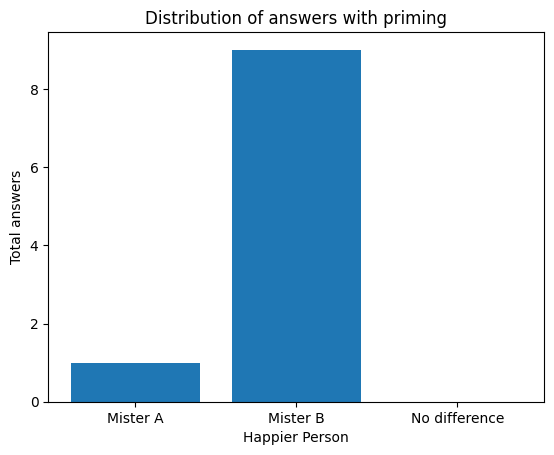

In [57]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_mr, B_mr, C_mr])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Distribution of answers with priming')

# Show the plot
plt.show()

As a preliminary result we might already conclude, that the Language Model does NOT answer according to prospect theory, unless it is specifically instructed (primed) to do so. 

## Recreating the study word by word 

#### Scenario 1
- Mr. A was given tickets to lotteries involving the World Series. He won $50 in one lottery and $25 in the other.
- Mr. B was given a ticket to a single, larger World Series lottery. He won $75. Who is happier?

| Answer option | Frequency |
|--------------|-----------|
| A            | 56        |
| B            | 16        |
| No difference | 15      |

(empirical results from the 1985 study) -> No segregation of gains for B

- Prompting the model with role of a random pedestrian

In [121]:
answers_1 = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 14,
        temperature = 2, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A was given tickets involcing the World Series. He won 50$ in one lottery and 25$ in the other. 
          Mr. B was given a ticket to a single, larger World Series lottery. He won 75$. Who is happier? Please answer by only giving the letter of the answer option. 
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_1.append(answer.strip())
    

In [122]:
answers_1

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']

In [117]:
# Collecting results
A_1 = answers_1.count("A")
B_1 = answers_1.count("B")
C_1 = answers_1.count("C")

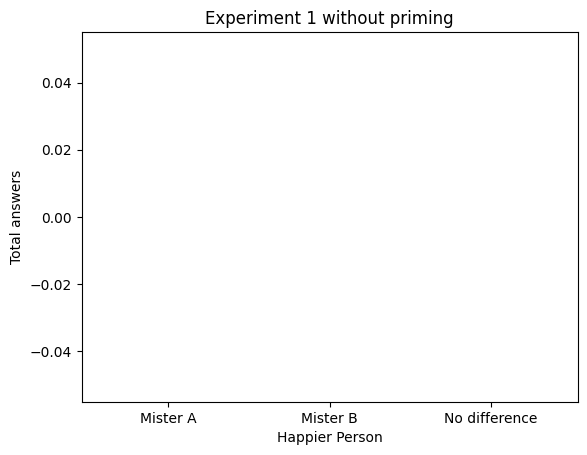

In [118]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_1, B_1, C_1])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Experiment 1 without priming')

# Show the plot
plt.show()

-  Prompting the model with role of market researcher:

In [12]:
answers_1_mr = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 0.6, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting. In a survey you are presented the following situation: 
          Mr. A was given tickets involcing the World Series. He won 50$ in one lottery and 25$ in the other. 
          Mr. B was given a ticket to a single, larger World Series lottery. He won 75$. Who is happier?
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_1_mr.append(answer.strip())
    

In [13]:
# Collecting results for prompt with priming
A_1_mr = answers_1_mr.count("A")
B_1_mr = answers_1_mr.count("B")
C_1_mr = answers_1_mr.count("C")

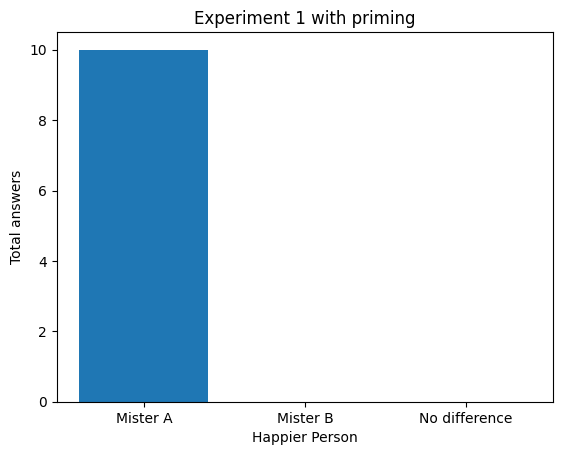

In [14]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_1_mr, B_1_mr, C_1_mr])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Experiment 1 with priming')

# Show the plot
plt.show()

#### Scenario 2
- Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
tax return and owed $100. He received a similar letter the same day from his state income tax
authority saying he owed $50. There were no other repercussions from either mistake.
- Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
return and owed $150. There were no other repercussions from his mistake. Who was more upset?

| Answer option | Frequency |
|--------------|-----------|
| A            | 66        |
| B            | 14        |
| No difference | 7      |

(empirical results from the 1985 study) -> No integration of losses for B


- Prompting the model with role of a random pedestrian

In [51]:
answers_2 = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
         tax return and owed $100. He received a similar letter the same day from his state income tax
         authority saying he owed $50. There were no other repercussions from either mistake. 
         Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
         return and owed $150. There were no other repercussions from his mistake. Who was more upset?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_2.append(answer.strip())
    

In [52]:
# Collecting results for prompt with priming
A_2 = answers_2.count("A")
B_2 = answers_2.count("B")
C_2 = answers_2.count("C")

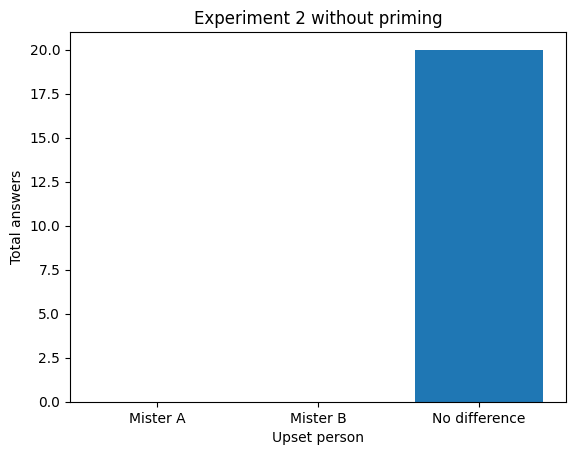

In [59]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_2, B_2, C_2])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 2 without priming')

# Show the plot
plt.show()

- Prompting the model with role of market researcher. 

In [48]:
answers_2_mr = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting. In a survey you are presented the following situation: 
         Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
         tax return and owed $100. He received a similar letter the same day from his state income tax
         authority saying he owed $50. There were no other repercussions from either mistake. 
         Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
         return and owed $150. There were no other repercussions from his mistake. Who is more upset?
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_2_mr.append(answer.strip())
    

In [50]:
# Collecting results for prompt with priming
# Alternative way of counting answers
A_2_mr = sum(1 for answer in answers_2_mr if answer.startswith("A"))
B_2_mr = sum(1 for answer in answers_2_mr if answer.startswith("B"))
C_2_mr = sum(1 for answer in answers_2_mr if answer.startswith("C"))


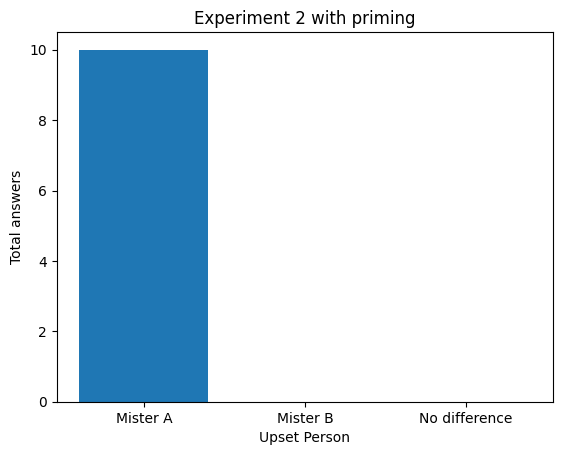

In [44]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_2_mr, B_2_mr, C_2_mr])

# Add labels and a title
plt.xlabel('Upset Person')
plt.ylabel('Total answers')
plt.title('Experiment 2 with priming')

# Show the plot
plt.show()

We can now see, that the phrasing of the question has a considerate impact on the *survey* outcome. This issue might be tackled with a more concise prompt resulting in more similar distributions for both ways of asking the question. However, we tried to recreate the experiment 1 by 1. This approach would also illustrate a common issue in this kind of research: When the LLM was trained with data containing the exact experiment we now try to recreate, we will naturally get similar results as in the original study. Judging by our results so far, for this specific study, this issue seems negligible. 

As of 13.11.2023 the issue no longer persisted.

#### Scenario 3
- Mr. A bought his first New York State lottery ticket and won $100. Also, in a freak accident,
he damaged the rug in his apartment and had to pay the landlord $80.
- Mr. B bought his first New York State lottery ticket and won $20? Who is happier?

| Answer option | Frequency |
|--------------|-----------|
| A            | 22        |
| B            | 61        |
| No difference | 4      |

(empirical results from the 1985 study) -> No cancellation of losses against larger gains for A


- Prompting the model with role of a random pedestrian

In [94]:
answers_3 = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A bought his first New York State lottery ticket and won $100. Also, in a freak accident,
         he damaged the rug in his apartment and had to pay the landlord $80.
         Mr. B bought his first New York State lottery ticket and won $20? Who is happier?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_3.append(answer.strip())
    

In [95]:
# Collecting results for prompt with priming
A_3 = answers_3.count("A")
B_3 = answers_3.count("B")
C_3 = answers_3.count("C")

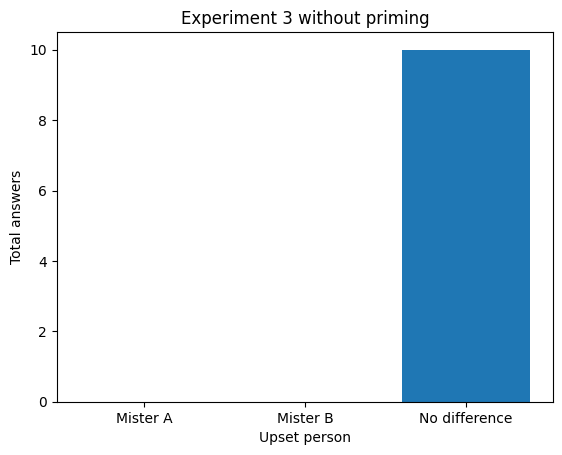

In [96]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_3, B_3, C_3])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 3 without priming')

# Show the plot
plt.show()

- Prompting the model with role of market researcher. 

For this experiment, the prompt was reworded a tiny bit. In order to show that in Mr. A's scenario both events occur on the same day, the word *Also* was replaced by *The same day*.

Experiment 2 was conducted with the exact wording of the original study. In their description of the scenario they specified, that both events occur on the same day. Therefore this adjustment
seems adequate in this case. 

Conducting experiment 3 without this rephrasing, ChatGPT does not seem to connect the two events happening in Mr. A's life and only considers the 100$ vs 20$ lottery prize.
However, conducting this experiment in ChatGPT, the results seem rather random. Even when Mr. B won 110$ the distribution of answers is ambiguous, which, according to the previous experiments, should not occur. 

In [113]:
answers_3_mr = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting. In a survey you are presented the following situation:
         Mr. A bought his first New York State lottery ticket and won $100. Also, in a freak accident, 
         he damaged the rug in his apartment and had to pay the landlord $80.
         Mr. B bought his first New York State lottery ticket and won $20? Who is happier? Please answer by only giving the letter of the answer option:
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_3_mr.append(answer.strip())
    

In [114]:
# Collecting results for prompt with priming
A_3_mr = answers_3_mr.count("A")
B_3_mr = answers_3_mr.count("B")
C_3_mr = answers_3_mr.count("C")

In [99]:
answers_3_mr

['A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'C', 'A']

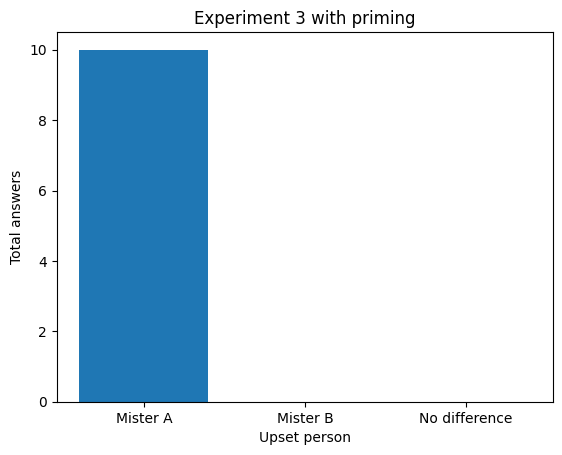

In [115]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_3_mr, B_3_mr, C_3_mr])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 3 with priming')

# Show the plot
plt.show()

#### Scenario 4
- Mr. A's car was damaged in a parking lot. He had to spend $200 to repair the damage. The
same day the car was damaged, he won $25 in the office football pool.
- Mr. B's car was damaged in a parking lot. He had to spend $175 to repair the damage.
Who was more upset?

| Answer option | Frequency |
|--------------|-----------|
| A            | 19        |
| B            | 63        |
| No difference | 5      |

(empirical results from the 1985 study) -> No segregation of "silver linings" for B.


- Prompting the model with role of a random pedestrian

In [123]:
answers_4 = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A's car was damaged in a parking lot. He had to spend $200 to repair the damage. The
         same day the car was damaged, he won $25 in the office football pool.
         Mr. B's car was damaged in a parking lot. He had to spend $175 to repairthe damage.
         Who was more upset? Please answer by only giving th eleter of the answer option:
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_4.append(answer.strip())
    

In [124]:
# Collecting results for prompt with priming
A_4 = answers_4.count("A")
B_4 = answers_4.count("B")
C_4 = answers_4.count("C")

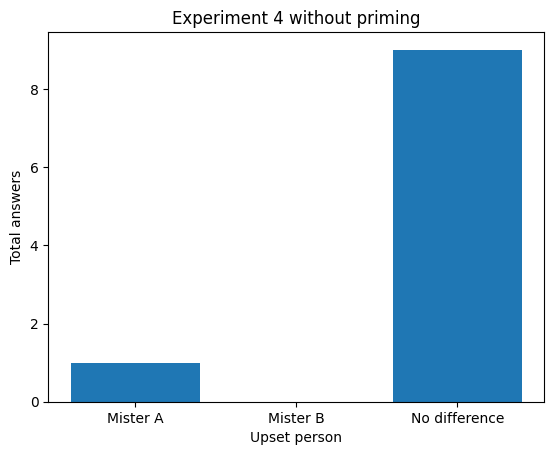

In [125]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_4, B_4, C_4])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 4 without priming')

# Show the plot
plt.show()

- Prompting the model with role of market researcher. 

In [140]:
answers_4_mr = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """"You are a market researcher and focus on Prospect Theory and Mental Accounting. In a survey you are presented the following situation:
         Mr. A's car was damaged in a parking lot. He had to spend $200 to repair the damage. The
         same day the car was damaged, he won $25 in the office football pool.
         Mr. B's car was damaged in a parking lot. He had to spend $175 to repair the damage.
         Who is more upset? Please answer by only giving the letter of the answer option:
          A: Mister A
          B: Mister B
          C: No difference."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_4_mr.append(answer.strip())

    # Asking for "Who is happier" at least leads opposite results. 
    

In [141]:
# Collecting results for prompt with priming
A_4_mr = answers_4_mr.count("A")
B_4_mr = answers_4_mr.count("B")
C_4_mr = answers_4_mr.count("C")

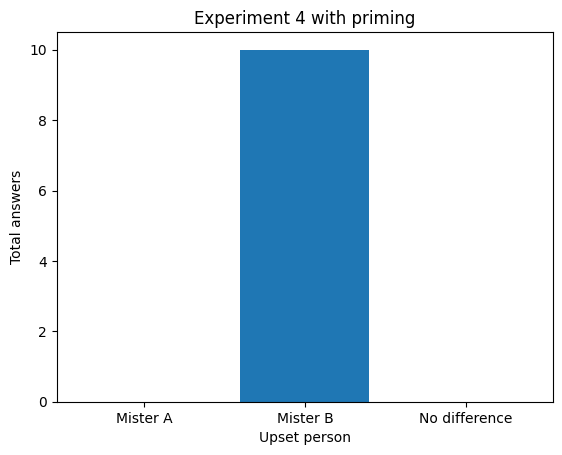

In [142]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_4_mr, B_4_mr, C_4_mr])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 4 with priming')

# Show the plot
plt.show()

In many cases, when primed, the LLM applies Prospect Theory correctly and answers almost every request as we would expect under the assumption of PT. However, in the last two examples, the results are ambiguous and I could not yet find out, how to get more realistic results. Some more work might be required here. 

I was generally wondering, for experiments we recreate 1 by 1 that do not result in more or less identical results than the original study, if we should even spend time trying to get more fitting results. Playing around with the system role, seed, temperature and the phrasing generally, different results can be achieved but are somehow *constructed*. 